#### Method that we should be followed.
1. K Means Clustering
2. Agglomerative hierarchical Clustering
3. DBSCAN Clustering 

#### Performace measured by
1. Silhouette Method 

The value more towards to `1` the performance is better and the value more towards to `0` the performance is bad

In [69]:
########## import all necessity function ##########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
#### Warning Remove
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

### K Means Clustering

In [3]:
#### import the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#### drop the CustomerID column
df.drop(['CustomerID'], axis = 1, inplace = True)
print("Dropped successfully.")

Dropped successfully.


In [5]:
#### print the dataset
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
#### label encode the "Genre" column
df.loc[:, 'Genre'] = df.loc[:, 'Genre'].map({'Male': 0, 'Female': 1})
print("Label Encoding is done.")

Label Encoding is done.


In [7]:
#### print the entire dataset
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [8]:
#### Scaling the dataset
scaler_ = StandardScaler()
df = pd.DataFrame(scaler_.fit_transform(df), columns = df.columns)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


<AxesSubplot:xlabel='Age'>

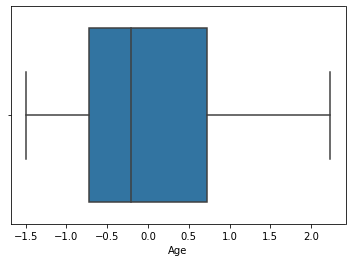

In [9]:
sns.boxplot(df.loc[:, 'Age'])

<AxesSubplot:xlabel='Annual Income (k$)'>

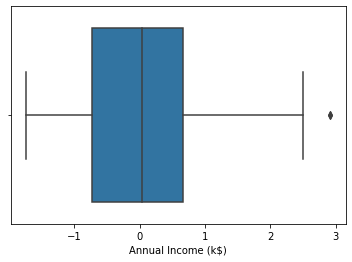

In [10]:
sns.boxplot(df.loc[:, 'Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)'>

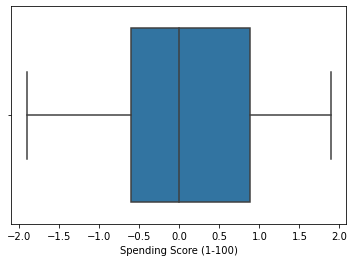

In [11]:
sns.boxplot(df.loc[:, 'Spending Score (1-100)'])

In [12]:
######## Do the K Means Clustering #########
wcss_ = []
for n_cluster_ in range(1, 21):
    Kmeans_ = KMeans(n_clusters = n_cluster_, max_iter = 500, random_state = 42)
    Kmeans_.fit_predict(df)
    wcss_.append(Kmeans_.inertia_)
    print("Cluster # {} is done".format(n_cluster_, end = "."))

Cluster # 1 is done
Cluster # 2 is done
Cluster # 3 is done
Cluster # 4 is done
Cluster # 5 is done
Cluster # 6 is done
Cluster # 7 is done
Cluster # 8 is done
Cluster # 9 is done
Cluster # 10 is done
Cluster # 11 is done
Cluster # 12 is done
Cluster # 13 is done
Cluster # 14 is done
Cluster # 15 is done
Cluster # 16 is done
Cluster # 17 is done
Cluster # 18 is done
Cluster # 19 is done
Cluster # 20 is done


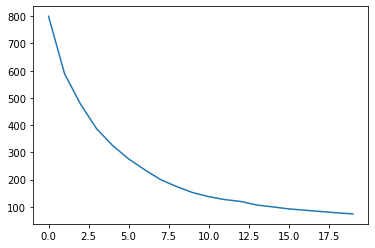

In [13]:
#### plot the WCSS
plt.plot(wcss_)
plt.show()

In [14]:
##### If i Take K = 12 then then what will be my "Silhouette" score
Kmeans_ = KMeans(n_clusters = 12, max_iter = 500, random_state = 42)
Kmeans_.fit_predict(df)
Kmeans_.labels_

array([ 9,  9, 11,  7, 11,  7, 11,  7, 10,  7, 10,  7, 11,  7, 10,  9, 11,
        9, 10,  7, 10,  9, 11,  9, 11,  9, 11,  9, 11,  7, 10,  7, 10,  9,
       11,  7, 11,  7, 11,  7,  1,  9,  3,  4, 11,  7,  1,  4,  4,  4,  1,
        5,  4,  3,  1,  3,  1,  3,  4,  3,  3,  5,  1,  1,  3,  5,  1,  1,
        5,  4,  3,  1,  1,  1,  3,  5,  1,  5,  4,  1,  3,  5,  3,  1,  4,
        3,  1,  4,  4,  1,  1,  5,  3,  4,  4,  5,  1,  4,  3,  5,  4,  1,
        3,  5,  3,  4,  1,  3,  3,  3,  3,  4,  4,  5,  4,  4,  1,  1,  1,
        1,  5,  4,  4,  2,  4,  6,  0,  2,  3,  2,  0,  2,  4,  6,  0,  6,
        8,  2,  0,  6,  8,  2,  4,  6,  0,  2,  3,  6,  8,  2,  0,  2,  8,
        6,  8,  6,  0,  6,  0,  6,  8,  6,  0,  6,  0,  6,  0,  6,  8,  2,
        0,  2,  0,  2,  8,  6,  0,  2,  0,  2,  8,  6,  0,  6,  8,  2,  8,
        2,  8,  6,  8,  6,  0,  6,  8,  6,  8,  2,  0,  2])

In [15]:
from sklearn.metrics import silhouette_score
silhouette_score(df.values, Kmeans_.labels_)

0.42542960188176976

In [16]:
score_ = []
for n_cluster_ in range(3, 21):
    Kmeans_ = KMeans(n_clusters = n_cluster_)
    Kmeans_.fit_predict(df)
    score_.append(silhouette_score(df.values, Kmeans_.labels_))

In [17]:
for index_, value_ in enumerate(score_):
    print(index_, " value is = ", value_)

0  value is =  0.25951265087431563
1  value is =  0.30123231688013513
2  value is =  0.31664426428574227
3  value is =  0.3258214131528671
4  value is =  0.3535521804915332
5  value is =  0.38733199737864654
6  value is =  0.4027213674010831
7  value is =  0.42076374869477745
8  value is =  0.4309897140638712
9  value is =  0.4104777286914784
10  value is =  0.42650108893074573
11  value is =  0.4096927984406036
12  value is =  0.41872547132411
13  value is =  0.4127312981482615
14  value is =  0.40326492276682985
15  value is =  0.4260729738147049
16  value is =  0.4136182951232209
17  value is =  0.4115274454003176


#### Advantage:
1. Easy to implement

#### Disadvantage:
1. We should predefined the number of cluster
2. Not Robust to the outliers

### Agglomerative Hierarchical Clustering

In [18]:
#### import the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
#### drop the CustomerID column
df.drop(['CustomerID'], axis = 1, inplace = True)
print("Dropped successfully.")

Dropped successfully.


In [20]:
#### label encode the "Genre" column
df.loc[:, 'Genre'] = df.loc[:, 'Genre'].map({'Male': 0, 'Female': 1})
print("Label Encoding is done.")

Label Encoding is done.


In [21]:
#### Scaling the dataset
scaler_ = StandardScaler()
df = pd.DataFrame(scaler_.fit_transform(df), columns = df.columns)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


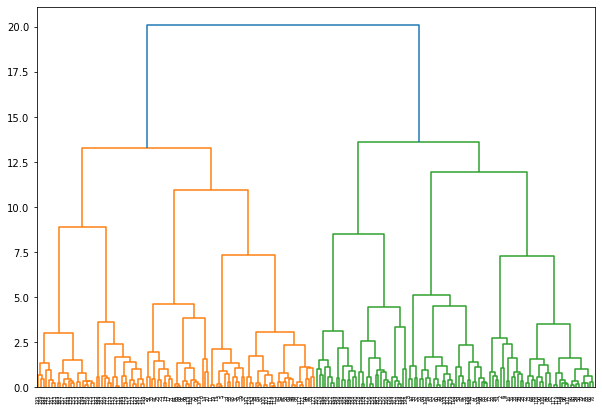

In [22]:
####### Plot the Dendrogram #########
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10, 7))
dendrogram_ = shc.dendrogram(shc.linkage(df, method = 'ward'))

In [23]:
##### import Agglomerative Cluster #####
from sklearn.cluster import AgglomerativeClustering
agglomerative_cluster_ = AgglomerativeClustering()
agglomerative_cluster_.fit_predict(df)

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [24]:
silhouette_score(df.values, agglomerative_cluster_.labels_)

0.24177953745462927

In [25]:
for n_cluster_ in range(2, 20):
    agglomerative_cluster_ = AgglomerativeClustering(n_clusters = n_cluster_)
    agglomerative_cluster_.fit_predict(df)
    print(n_cluster_, "   ", silhouette_score(df.values, agglomerative_cluster_.labels_))

2     0.24177953745462927
3     0.24834537795671963
4     0.26322605188202447
5     0.28699413201651747
6     0.31024459685260536
7     0.34555782664693324
8     0.3788796050129373
9     0.39225805358687793
10     0.4176254448686808
11     0.42517748630372254
12     0.42440324303677535
13     0.4198062925672963
14     0.4254321544952805
15     0.4344600643875796
16     0.43932320264453567
17     0.4206944029733773
18     0.42765394339048635
19     0.42525042765449045


#### Advantage:
1. Widely applicable

#### Disadvantage:
1. Required space and high computation 

### DBSCAN Clustering

In [26]:
#### import the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
#### drop the CustomerID column
df.drop(['CustomerID'], axis = 1, inplace = True)
print("Dropped successfully.")

Dropped successfully.


In [28]:
#### label encode the "Genre" column
df.loc[:, 'Genre'] = df.loc[:, 'Genre'].map({'Male': 0, 'Female': 1})
print("Label Encoding is done.")

Label Encoding is done.


In [29]:
#### Scaling the dataset
scaler_ = StandardScaler()
df = pd.DataFrame(scaler_.fit_transform(df), columns = df.columns)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


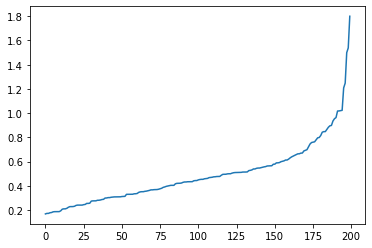

In [30]:
####### Find the correct Epsilon Value #######
from sklearn.neighbors import NearestNeighbors
nearest_neighbour_ = NearestNeighbors(n_neighbors = 3)
nearest_neighbour_.fit(df)
distance_, indices_ = nearest_neighbour_.kneighbors()
distance_ = np.sort(distance_[:, 1], axis = 0)
plt.plot(distance_)
plt.show()

In [31]:
###### DBSCAN import #######
from sklearn.cluster import DBSCAN
dbscan_ = DBSCAN(eps = 1.6, min_samples = 5)
dbscan_.fit_predict(df)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int64)

In [32]:
silhouette_score(df.values, dbscan_.labels_)

0.2776035125578272

##### Advantage:
1. No need to predefined number of clusters
2. Robust to the outliers

##### Disadvantage:
1. If there are varying Density then it might be a problem

In [70]:
##### import the dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
df.iloc[:, -1].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [72]:
#### Drop the Id and Species column
df.drop(['Id', 'Species'], axis = 1, inplace = True)

In [73]:
##### Scaling the dataset
scaler_ = MinMaxScaler()
df = pd.DataFrame(scaler_.fit_transform(df), columns = df.columns)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [74]:
##### K Means Clustering #####
wcss_ = []
for n_cluster_ in range(1, 21):
        Kmeans_ = KMeans(n_clusters = n_cluster_)
        Kmeans_.fit(df)
        wcss_.append(Kmeans_.inertia_)

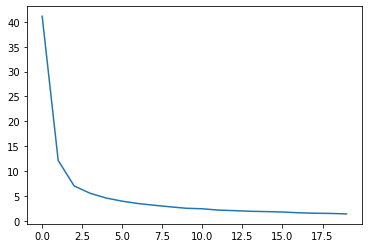

In [75]:
#### plot the wcss_
plt.plot(wcss_)

In [76]:
for n_cluster_ in range(2, 21):
        Kmeans_ = KMeans(n_clusters = n_cluster_, random_state = 42)
        Kmeans_.fit(df)
        print(silhouette_score(df.values, Kmeans_.labels_))

0.6294675561906644
0.5043188549150884
0.4446273300650682
0.351912893247111
0.35523857544211473
0.3463155502774262
0.325288907708986
0.31218899464728694
0.3415687165743692
0.3481830024335079
0.33103478723082685
0.3293920706175138
0.3004356618170443
0.31801440300732653
0.3264656323644915
0.32189751438004266
0.3037294983077274
0.30561732552876214
0.3075404673307825


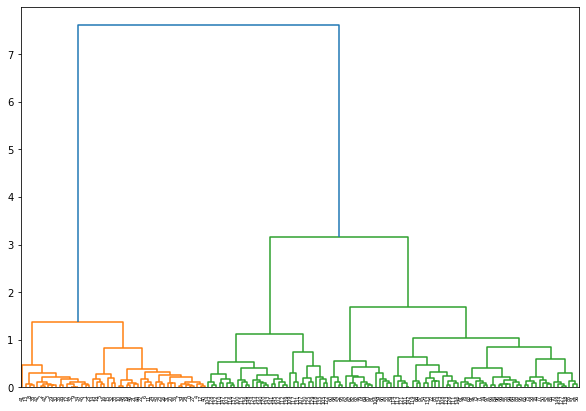

In [77]:
##### Aggloemerative Clustering ######
plt.figure(figsize = (10, 7))
dendrogram_ = shc.dendrogram(shc.linkage(df, method = 'ward'))

In [78]:
for n_cluster_ in range(2, 21):
    agglomerative_cluster_ = AgglomerativeClustering(n_clusters = n_cluster_)
    agglomerative_cluster_.fit(df)
    print(silhouette_score(df.values, agglomerative_cluster_.labels_))

0.6294675561906644
0.5043490792923953
0.43255652632301644
0.34537101373205314
0.3239072422446529
0.32857302455221316
0.3193551508780463
0.31011990380392485
0.3215529908418728
0.3242135978153741
0.3280784775796031
0.3270349858335257
0.31241315904006917
0.31831616330398743
0.31668242815363057
0.31655069847671025
0.31789753646170726
0.321730555878638
0.32170539350560423


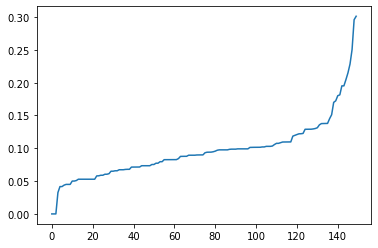

In [79]:
##### DBSCAN Clustering #####

####### Find the correct Epsilon Value #######
from sklearn.neighbors import NearestNeighbors
nearest_neighbour_ = NearestNeighbors(n_neighbors = 5)
nearest_neighbour_.fit(df)
distance_, indices_ = nearest_neighbour_.kneighbors()
distance_ = np.sort(distance_[:, 1], axis = 0)
plt.plot(distance_)
plt.show()

In [81]:
dbscan_ = DBSCAN(eps = 0.25, min_samples = 3)
dbscan_.fit(df)
silhouette_score(df.values, dbscan_.labels_)

0.5308893239015932

In [82]:
dbscan_.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)